In [71]:
import pandas as pd
import pylab as pl
import numpy as np

In [6]:
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


In [7]:
dados.shape


(127380, 136)

In [10]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

# Porcentagem de participantes por idade 01

In [12]:
porcent = (dados['NU_IDADE'].value_counts() / dados['NU_IDADE'].value_counts().sum()) * 100

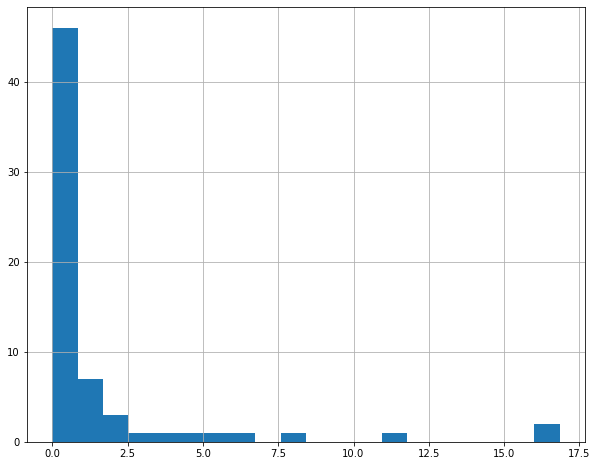

In [93]:
porcent.hist(bins = 20, figsize = (10, 8))

# Graficos

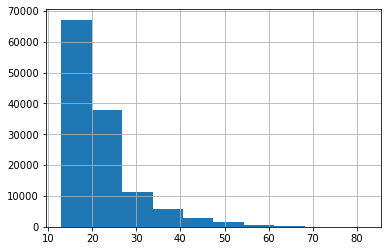

In [16]:
dados['NU_IDADE'].hist()

# Aumentando o tamanho e dispersão do dado

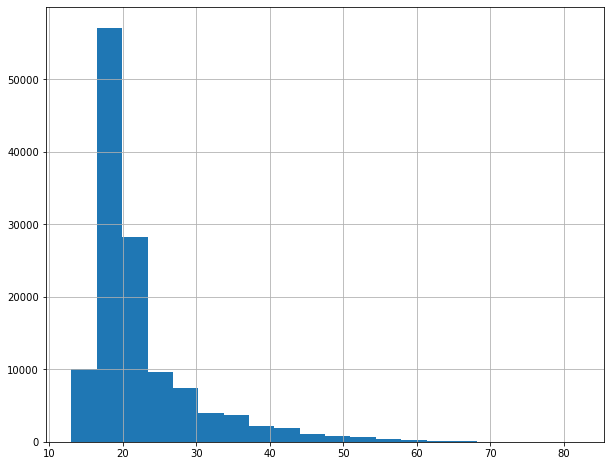

In [17]:
dados['NU_IDADE'].hist(bins = 20, figsize =(10, 8))

# DESCOBRINDO DE QUAL ESTADO SÃO OS DE 13 ANOS (DESAFIO 2)

In [25]:
dados[['NU_IDADE', 'SG_UF_RESIDENCIA']]

,NU_IDADE,SG_UF_RESIDENCIA
0,17,PA
1,23,PA
2,35,PA
3,23,PA
4,16,PA
...,...,...
127375,17,MG
127376,18,BA
127377,22,BA
127378,26,BA


In [107]:

dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA']

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

# ADICIONANDO TITULO NO GRAFICO 03

Text(0.5, 0.98, 'IDADES')

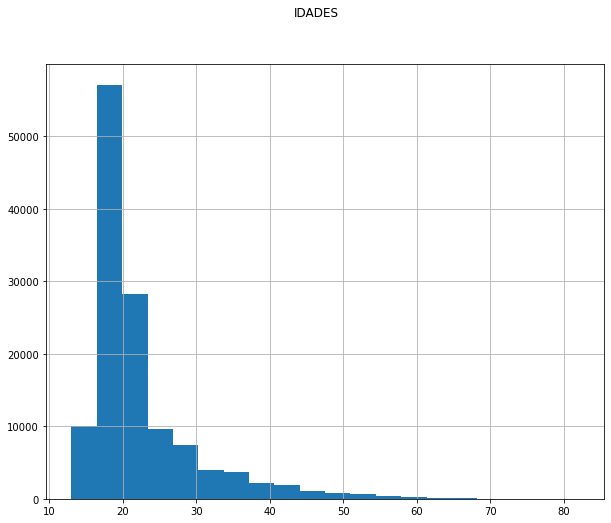

In [73]:
dados['NU_IDADE'].hist(bins = 20, figsize =(10, 8))
pl.suptitle("IDADES")

# Plotar os Histogramas das idades dos do treineiro e não treineiros 04

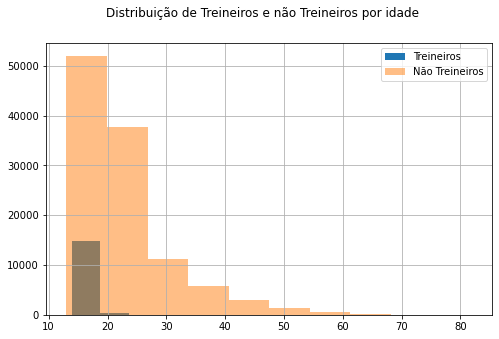

In [156]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(grid = True, figsize=(8, 5))
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(grid = True, figsize=(8, 5), alpha = 0.5)

pl.suptitle("Distribuição de Treineiros e não Treineiros por idade")
pl.legend(["Treineiros", "Não Treineiros"])

Text(0.5, 0.98, 'Distribuição de Treineiros por idade')

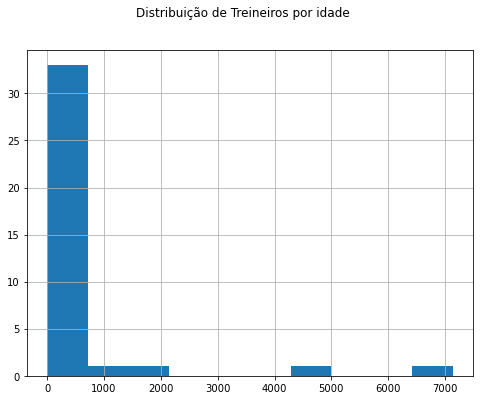

In [148]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().hist(grid = True, figsize=(8,6))
pl.suptitle("Distribuição de Treineiros por idade")

Text(0.5, 0.98, 'Distribuição de NÃO Treineiros por idade')

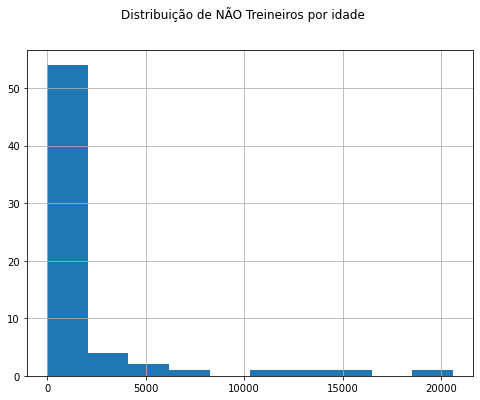

In [147]:
dados.query("IN_TREINEIRO == 0")["NU_IDADE"].value_counts().hist(grid = True, figsize=(8,6))
pl.suptitle("Distribuição de NÃO Treineiros por idade")

# Continuação

## MÉDIA

In [94]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

## Desvio Padrão

In [95]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

## Tabela de dados

In [96]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


* 50% -> Mediana
* 25% -> Mediana abaixo da mediana de 50 
* 75% -> Mediana acima da mediana de 50

### Tirando a mediana de 10%


In [97]:
dados["NU_NOTA_LC"].quantile(0.9)

596.3

### Tirando a mediana de 90%

In [98]:
dados["NU_NOTA_LC"].quantile(0.1)

434.5

# Comparar as distribuições das provas em inglês espanhol 05


### Provas de inglês

Text(0.5, 0.98, 'INGLÊS')

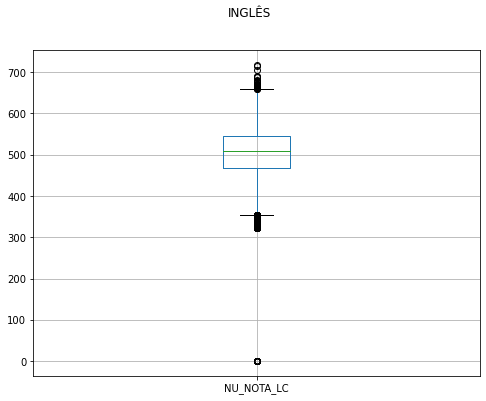

In [130]:
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))
pl.suptitle("INGLÊS")

## Provas de Espanhol

Text(0.5, 0.98, 'ESPANHOL')

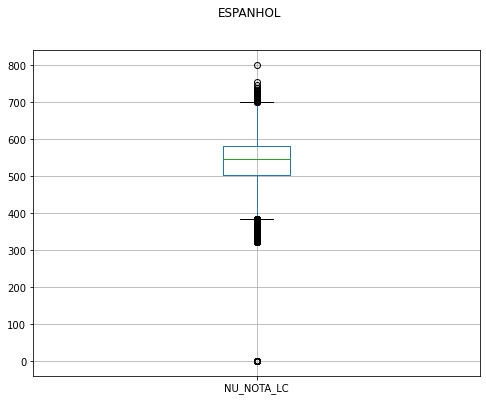

In [129]:
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].plot.box(grid = True, figsize=(8,6))
pl.suptitle("ESPANHOL")

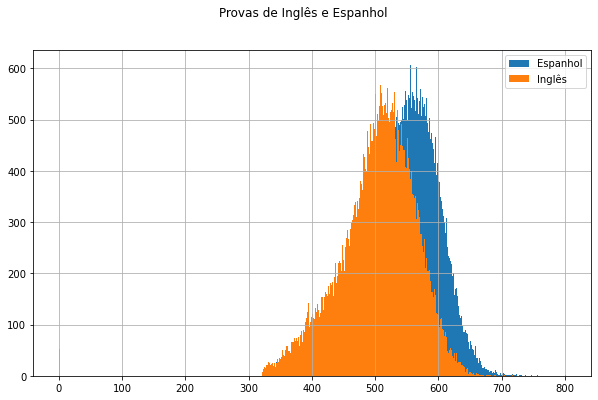

In [168]:
dados.query("TP_LINGUA == 0")["NU_NOTA_LC"].hist(bins = 500, figsize = (10, 6))
dados.query("TP_LINGUA == 1")["NU_NOTA_LC"].hist(bins = 500, figsize = (10, 6))

pl.suptitle("Provas de Inglês e Espanhol")
pl.legend(["Espanhol", "Inglês"])

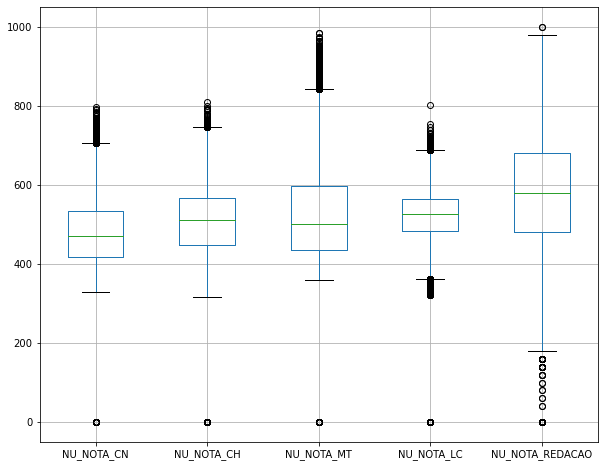

In [164]:
dados[provas].boxplot(grid = True, figsize = (10,8))